In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("train.csv")#Making it Relative Path -Mayank

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline

In [6]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
data.shape

(10886, 12)

In [8]:
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

In [9]:
data['year'] = data['datetime'].dt.year 
data['month'] = data['datetime'].dt.month 
data['day'] = data['datetime'].dt.day 
data['hour'] = data['datetime'].dt.hour 


In [10]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [11]:
data=data.drop('datetime',axis=1)

In [12]:
def normalize(df,columns):
    result=df.copy()
    for feature_name in columns :
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / std_value
        
    return result

In [13]:
data_normalize=normalize(data,["temp","atemp","humidity","windspeed"])


In [14]:



def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data



In [15]:


data = dummy_data(data_normalize, ["season","weather","hour"])


In [16]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,-1.333599,-1.092687,0.993167,-1.567682,3,13,16,2011,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-1.438841,-1.182367,0.941206,-1.567682,8,32,40,2011,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.438841,-1.182367,0.941206,-1.567682,5,27,32,2011,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.333599,-1.092687,0.681399,-1.567682,3,10,13,2011,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-1.333599,-1.092687,0.681399,-1.567682,0,1,1,2011,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import seaborn as sns

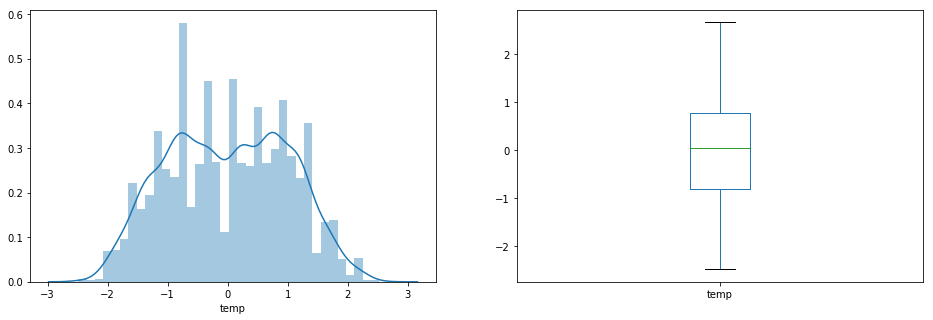

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['temp']); 
plt.subplot(122)
data_normalize['temp'].plot.box(figsize=(16,5)) 
plt.show()

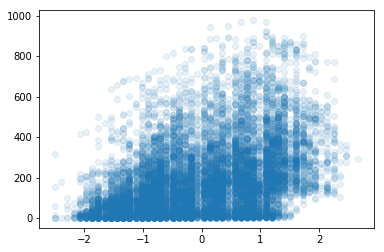

In [19]:
plt.scatter(data['temp'],data['count'],alpha=0.1,
            cmap='viridis')

In [20]:
data['temp'].describe()

count    1.088600e+04
mean     2.401982e-16
std      1.000000e+00
min     -2.491258e+00
25%     -8.073910e-01
50%      3.454240e-02
75%      7.712342e-01
max      2.665584e+00
Name: temp, dtype: float64

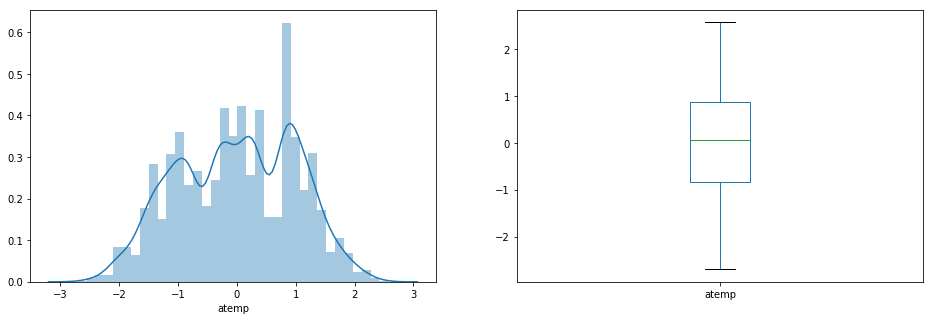

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['atemp']); 
plt.subplot(122)
data_normalize['atemp'].plot.box(figsize=(16,5)) 
plt.show()

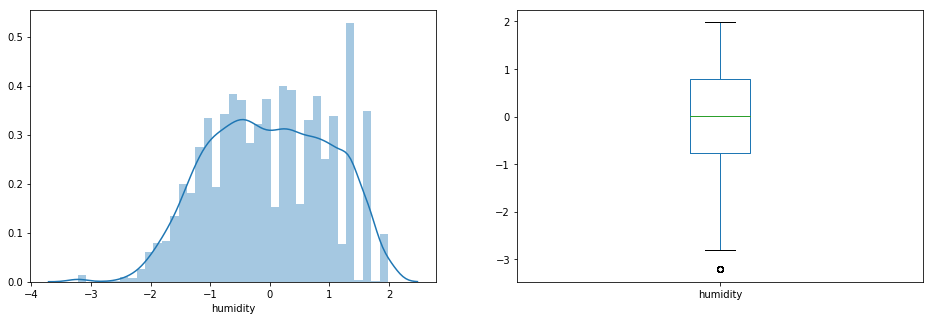

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['humidity']); 
plt.subplot(122)
data_normalize['humidity'].plot.box(figsize=(16,5)) 
plt.show()

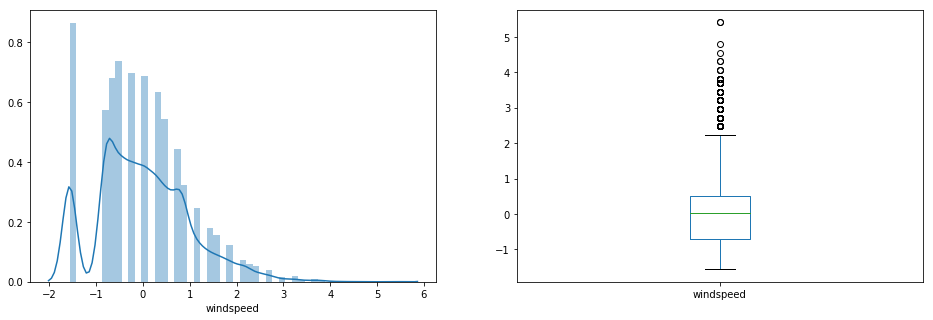

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['windspeed']); 
plt.subplot(122)
data_normalize['windspeed'].plot.box(figsize=(16,5)) 
plt.show()

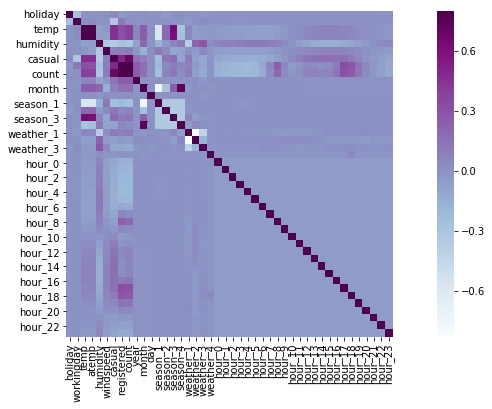

In [ ]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [ ]:
import numpy as np

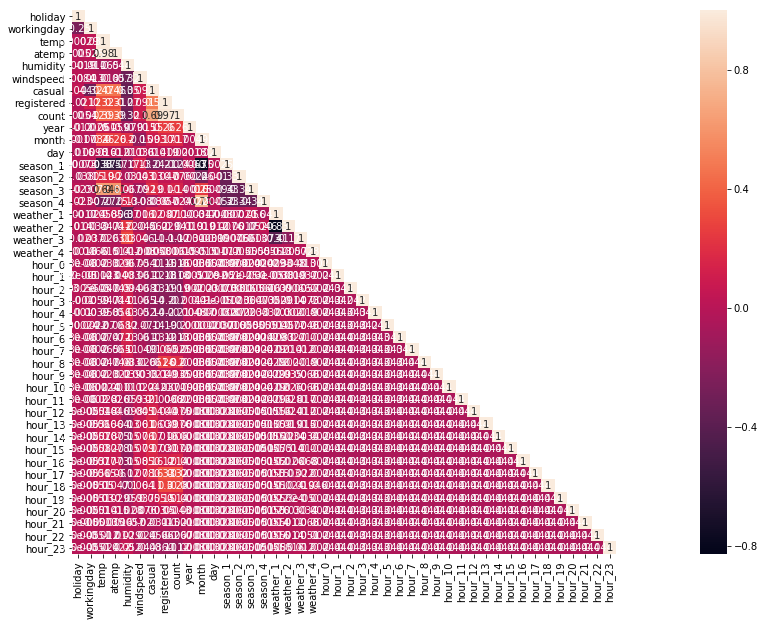

In [ ]:
corrMat = data.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(30, 10))
sns.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

In [ ]:
data.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,...,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,...,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,...,0.078261,0.081880,0.077489,0.065038,0.050367,0.030436,0.013931,-0.000354,-0.012467,-0.023808
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,...,0.075487,0.078396,0.073191,0.060075,0.047119,0.029169,0.015231,0.001621,-0.010430,-0.021702
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,...,-0.146758,-0.150047,-0.145353,-0.124575,-0.100366,-0.059264,-0.027645,0.005666,0.029136,0.051748
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,...,0.076080,0.079278,0.085403,0.077874,0.063611,0.036765,0.007613,-0.019514,-0.024450,-0.044105
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,...,0.169792,0.167442,0.163486,0.164982,0.106204,0.054630,0.002974,-0.031198,-0.056163,-0.086048
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,...,0.015645,0.031451,0.118697,0.329179,0.296144,0.153190,0.050162,-0.014882,-0.061716,-0.112840
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,...,0.059874,0.072405,0.144061,0.319974,0.276218,0.142797,0.042645,-0.021013,-0.066949,-0.117819
year,0.012021,-0.002482,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,...,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807


In [ ]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,-1.333599,-1.092687,0.993167,-1.567682,3,13,16,2011,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-1.438841,-1.182367,0.941206,-1.567682,8,32,40,2011,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.438841,-1.182367,0.941206,-1.567682,5,27,32,2011,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.333599,-1.092687,0.681399,-1.567682,3,10,13,2011,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-1.333599,-1.092687,0.681399,-1.567682,0,1,1,2011,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["count"]
    
    

    data_x = data.drop(["count","casual","registered"], axis=1)

    

    return data_x.values, data_y

data_x, data_y = split_valid_test_data(data)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = data_x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5376      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 170,241
Trainable params: 170,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose =1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

In [ ]:
NN_model.fit(data_x, data_y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Instructions for updating:
Use tf.cast instead.
Train on 8708 samples, validate on 2178 samples
Epoch 1/500
8708/8708 [==============================] - 2s 183us/step - loss: 128.0078 - mean_absolute_error: 128.0078 - val_loss: 192.6756 - val_mean_absolute_error: 192.6756

Epoch 00001: val_loss improved from inf to 192.67555, saving model to Weights-001--192.67555.hdf5
Epoch 2/500
8708/8708 [==============================] - 1s 143us/step - loss: 122.5296 - mean_absolute_error: 122.5296 - val_loss: 177.7181 - val_mean_absolute_error: 177.7181

Epoch 00002: val_loss improved from 192.67555 to 177.71810, saving model to Weights-002--177.71810.hdf5
Epoch 3/500
8708/8708 [==============================] - 1s 146us/step - loss: 99.7113 - mean_absolute_error: 99.7113 - val_loss: 150.0143 - val_mean_absolute_error: 150.0143

Epoch 00003: val_loss improved from 177.71810 to 150.01435, saving model to Weights-003--150.01435.hdf5
Epoch 4/500
8708/8708 [==============================] - 1s 144us/

8708/8708 [==============================] - 1s 147us/step - loss: 64.1420 - mean_absolute_error: 64.1420 - val_loss: 119.7157 - val_mean_absolute_error: 119.7157

Epoch 00033: val_loss did not improve from 82.74707
Epoch 34/500
8708/8708 [==============================] - 1s 153us/step - loss: 65.7186 - mean_absolute_error: 65.7186 - val_loss: 90.4755 - val_mean_absolute_error: 90.4755

Epoch 00034: val_loss did not improve from 82.74707
Epoch 35/500
8708/8708 [==============================] - 1s 156us/step - loss: 63.7546 - mean_absolute_error: 63.7546 - val_loss: 163.2520 - val_mean_absolute_error: 163.2520

Epoch 00035: val_loss did not improve from 82.74707
Epoch 36/500
8708/8708 [==============================] - 1s 156us/step - loss: 66.8293 - mean_absolute_error: 66.8293 - val_loss: 144.5515 - val_mean_absolute_error: 144.5515

Epoch 00036: val_loss did not improve from 82.74707
Epoch 37/500
8708/8708 [==============================] - 1s 160us/step - loss: 64.5694 - mean_abso


Epoch 00068: val_loss did not improve from 80.92636
Epoch 69/500
8708/8708 [==============================] - 1s 156us/step - loss: 61.6791 - mean_absolute_error: 61.6791 - val_loss: 118.4910 - val_mean_absolute_error: 118.4910

Epoch 00069: val_loss did not improve from 80.92636
Epoch 70/500
8708/8708 [==============================] - 1s 161us/step - loss: 61.7799 - mean_absolute_error: 61.7799 - val_loss: 95.2948 - val_mean_absolute_error: 95.2948

Epoch 00070: val_loss did not improve from 80.92636
Epoch 71/500
8708/8708 [==============================] - 1s 147us/step - loss: 60.4436 - mean_absolute_error: 60.4436 - val_loss: 133.4687 - val_mean_absolute_error: 133.4687

Epoch 00071: val_loss did not improve from 80.92636
Epoch 72/500
8708/8708 [==============================] - 1s 143us/step - loss: 61.5274 - mean_absolute_error: 61.5274 - val_loss: 100.2319 - val_mean_absolute_error: 100.2319

Epoch 00072: val_loss did not improve from 80.92636
Epoch 73/500
8708/8708 [=========

8708/8708 [==============================] - 1s 145us/step - loss: 49.4861 - mean_absolute_error: 49.4861 - val_loss: 83.6825 - val_mean_absolute_error: 83.6825

Epoch 00104: val_loss did not improve from 67.47117
Epoch 105/500
8708/8708 [==============================] - 1s 144us/step - loss: 51.1636 - mean_absolute_error: 51.1636 - val_loss: 118.6476 - val_mean_absolute_error: 118.6476

Epoch 00105: val_loss did not improve from 67.47117
Epoch 106/500
8708/8708 [==============================] - 1s 145us/step - loss: 49.4896 - mean_absolute_error: 49.4896 - val_loss: 72.6309 - val_mean_absolute_error: 72.6309

Epoch 00106: val_loss did not improve from 67.47117
Epoch 107/500
8708/8708 [==============================] - 1s 144us/step - loss: 49.3454 - mean_absolute_error: 49.3454 - val_loss: 104.7277 - val_mean_absolute_error: 104.7277

Epoch 00107: val_loss did not improve from 67.47117
Epoch 108/500
8708/8708 [==============================] - 1s 147us/step - loss: 50.0877 - mean_ab